In [ ]:
#Instacart Market Basket Analysis

In [ ]:
%matplotlib inline
import string
import re
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly as py
import psycopg2
import textblob
import textatistic
import os
import math
import random
from nltk.corpus import stopwords
import seaborn as sbn
import requests
from wordcloud import *
from bs4 import BeautifulSoup
from collections import Counter
matplotlib.style.use('ggplot')
py.offline.init_notebook_mode()
import plotly.graph_objs as go
import psycopg2
import seaborn as sbn
import requests
import textatistic
import networkx as nx
from matplotlib import pyplot
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [ ]:
aisles = pd.read_csv('/home/faculty/millbr02/pub/ecomm/aisles.csv')
departments = pd.read_csv('/home/faculty/millbr02/pub/ecomm/departments.csv')
#orderProd = pd.read_csv('/home/faculty/millbr02/pub/ecomm/order_products__prior.csv')
orders_training = pd.read_csv('/home/faculty/millbr02/pub/ecomm/order_products__train.csv')
orders= pd.read_csv('/home/faculty/millbr02/pub/ecomm/orders.csv')
products = pd.read_csv('/home/faculty/millbr02/pub/ecomm/products.csv')
#jayson= pd.read_json('/home/faculty/millbr02/pub/ecomm/item_item.json')



In [ ]:
orders.head()


In [ ]:
products.head()

In [ ]:
orders_training.head()

In [ ]:
data_frame = orders_training[orders_training.add_to_cart_order == 1]

In [ ]:
result = data_frame.groupby(data_frame.product_id)['product_id'].count().sort_values(ascending=False).head(1)

new = pd.DataFrame(result)

new.columns = ['Count']

new = new.reset_index()

In [ ]:
products[products.product_id == 24852]


In [ ]:
merged = pd.merge(new, products)

In [ ]:
merged

In [ ]:
aco = orders_training.groupby('order_id')['add_to_cart_order'].max()
aco = pd.DataFrame(aco)
aco = aco.reset_index()

In [ ]:
aco.head()


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
axes.violinplot(aco['add_to_cart_order'], showmeans=True, showmedians=True)

In [ ]:

pivot = pd.pivot_table(orders_training[orders_training.order_id < 100], index='order_id', values='add_to_cart_order',columns='product_id' )

In [ ]:
pivot


In [ ]:
pivot.iloc[0][pivot.iloc[0].notnull()]


In [ ]:
pivot.iloc[1][pivot.iloc[1].notnull()]


In [ ]:
order_sorted = orders_training.sort_values('order_id').head(10)


In [ ]:
train = order_sorted


In [ ]:
productDict = {}
for i,row in train.iterrows():
    current = row['order_id']
    if current not in productDict:
        productDict[current] = [row['product_id']]
    else:
        productDict[current].append(row['product_id'])

In [ ]:
prodtList = list(productDict.values())

In [ ]:
product_id_matrix = {}
for p_ids in prodtList:
    for pid in p_ids:
        if pid not in product_id_matrix:
            count = 1
            product_id_matrix[pid] = {k:count for k in p_ids if k!=i}
        else:
            for i in p_ids:
                if i != pid:
                    if i in product_id_matrix[pid]:
                        product_id_matrix[pid][i] += count
                    else:
                        product_id_matrix[pid][i] = 1

In [ ]:
product_id_matrix


In [ ]:
aco = orders_training.groupby('order_id')



In [ ]:
def item_name(product_id):
    basket = []
    suggestion = []
    new_dict = product_id_matrix[product_id]
    sorted_list = reversed(sorted(new_dict.items(), key=operator.itemgetter(1)))
    for item in sorted_list:
        basket.append(item)
    while len(basket) > 20:
        basket.pop()
    for item in basket:
        item = products[products.product_id == item[0]].product_name
        suggestion.append(item)
    return suggestion

In [ ]:

products[products.product_id == 7]


In [ ]:
products.count()

In [ ]:
#random_df = products.sample(frac=1).reset_index(drop=True)
#training_set = random_df.head(39750)
#test_set = random_df.iloc[39750:].reset_index(drop=True)

In [ ]:
training_set.count()

In [ ]:
test_set.count()

In [ ]:
msk = np.random.rand(len(orders_training)) <0.8
train = orders_training[msk]
test = orders_training[~msk]


In [ ]:
%%time
print(len(train))
print(len(test))

In [ ]:
def getval(d):
    return d[1]

In [ ]:
def predictor(mat, item1, item2):
    r = list(mat[item1].items()) + list(mat[item2].items())
    r = sorted(recs, key=getval, reverse=True)
    r = [recs[x][0] for x in range(min(5,len(r)))]
    r = list(set(r))
    return r

In [ ]:
## Testing
test.head()

In [ ]:
tco = test.groupby('order_id')

In [ ]:
hits = 0
count = 0
for order in tco.groups.keys():
    contents = list(tco.get_group(order).sort_values('add_to_cart_order').product_id)
    if len(contents) > 2:
        count += 1
        r = predictor(product_id_matrix, contents[0], contents[1])
        basket = set(contents[3:])
        r = set(r)
        correct_r = r.intersection(basket)
        if len(correct_r) >= 1:
            hits += 1
print(hits, count, hits/count)

In [ ]:
print(predictor(product_id_matrix,12345,1213))


In [ ]:
for p in predictor(product_id_matrix,12345,1213):
    print(product[product.product_id == p].product_name)

### Aisle to Aisle Matrix

In [266]:
merge1 = products.merge(orders_training).sort_values(by='order_id').reset_index(drop=True)

In [267]:
merge2 = merge1.set_index(["order_id"]).reset_index()


In [268]:
grouped = merge2.groupby('order_id')


In [269]:
grouped.get_group(1).sort_values(by='add_to_cart_order').reset_index(drop=True)


,order_id,product_id,product_name,aisle_id,department_id,add_to_cart_order,reordered
0,1,49302,Bulgarian Yogurt,120,16,1,1
1,1,11109,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,2,1
2,1,10246,Organic Celery Hearts,83,4,3,0
3,1,49683,Cucumber Kirby,83,4,4,0
4,1,43633,Lightly Smoked Sardines in Olive Oil,95,15,5,1
5,1,13176,Bag of Organic Bananas,24,4,6,0
6,1,47209,Organic Hass Avocado,24,4,7,0
7,1,22035,Organic Whole String Cheese,21,16,8,1


In [270]:
%%time
aisles_to_aisles = {}
for i in list(set(merge2.order_id)):
    grouped2 = grouped.get_group(i).sort_values(by='add_to_cart_order').reset_index(drop=True)  
    aisles_list = list(grouped_object_df.aisle_id)
    
    for item in list(zip(aisles_list,aisles_list[1:])):
        if item[0] not in aisles_to_aisles:
            aisles_to_aisles[item[0]] = {item[1]:1}
        else:
            if item[1] not in aisles_to_aisles[item[0]]:
                aisles_to_aisles[item[0]][item[1]] = 1
            else:
                aisles_to_aisles[item[0]][item[1]] += 1

CPU times: user 2min 26s, sys: 560 ms, total: 2min 27s
Wall time: 2min 26s


In [273]:
len(aisles_to_aisles)


12

In [274]:
df = pd.DataFrame(aisles_to_aisles)


In [279]:
df.head()

,3,22,23,24,67,78,84,96,98,107,121,128
3,131209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131209.0,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131209.0,NaN,NaN
23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131209.0,NaN,NaN
24,NaN,NaN,NaN,131209.0,NaN,131209.0,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,131209.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [305]:
clean = clean.T
clean_log = clean.apply(np.log).fillna(0)



In [306]:
clean_log.head()

,3,22,23,24,67,78,84,92,96,98,107,121,128
3,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,11.784547,-inf
22,-inf,-inf,-inf,-inf,11.784547,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf
23,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,-inf,11.784547,-inf,-inf
24,-inf,-inf,-inf,-inf,-inf,-inf,-inf,11.784547,-inf,-inf,-inf,-inf,-inf
67,-inf,-inf,-inf,-inf,-inf,11.784547,-inf,-inf,-inf,-inf,-inf,-inf,-inf


([array([ 10.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 11.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 11.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 10.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 11.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 10.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 11.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 11.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 11.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 11.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 8.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  1.]),
  array([ 11.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 11.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([      0. ,   39362.7,   78725.4,  118088.1,  157450.8,  196813.5,
         236

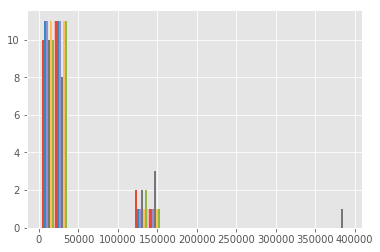

In [287]:
plt.hist(clean)

In [307]:
cutoff_trying = aisles_to_aisles.copy()


In [308]:
for key in cutoff_trying:
    for k in cutoff_trying[key]:
        if cutoff_trying[key][k] < 1000 or key == k:
            cutoff_trying[key][k] = np.nan

In [309]:
cutoff_trying = pd.DataFrame(cutoff_trying).fillna(0)


In [310]:
cutoff_trying.head()


,3,22,23,24,67,78,84,96,98,107,121,128
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131209.0,0.0,0.0
22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131209.0,0.0,0.0
23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,131209.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,131209.0,0.0,0.0,0.0,0.0,0.0,0.0
67,0.0,131209.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [311]:
list_of_lists = []

for row in cutoff_trying.iterrows():
    index, data = row
    list_of_lists.append(data.tolist())

In [312]:
#highest range of flowing aisles
i = 1
most_ocur = []
for sub in list_of_lists:
    if sum(sub) != 0:
        most_ocur.append([i, sum(sub)])
    i += 1

In [313]:
from operator import itemgetter
most_ocur = sorted(most_ocur, key=itemgetter(1), reverse=True)

In [314]:
most_ocur


[[11, 393627.0],
 [6, 262418.0],
 [1, 131209.0],
 [2, 131209.0],
 [3, 131209.0],
 [4, 131209.0],
 [5, 131209.0],
 [7, 131209.0],
 [8, 131209.0],
 [9, 131209.0],
 [10, 131209.0],
 [12, 131209.0],
 [13, 131209.0]]

In [299]:
while len(most_ocur) > 10:
    del most_ocur[-1]

In [300]:
most_ocur

[[11, 393627.0],
 [6, 262418.0],
 [1, 131209.0],
 [2, 131209.0],
 [3, 131209.0],
 [4, 131209.0],
 [5, 131209.0],
 [7, 131209.0],
 [8, 131209.0],
 [9, 131209.0]]

In [301]:
#Creating a list of top flowing rows
top_list = [11,6,1,2,3,4,5,6,7,8,9]


In [302]:
frequent = pd.DataFrame(columns = [11,6,1,2,3,4,5,6,7,8,9])

In [315]:
for i in frequent:
    frequent = frequent.append(clean_log.iloc[item[0]])

IndexError: single positional indexer is out-of-bounds

In [318]:
frequent.index -=1

TypeError: cannot perform __sub__ with this index type: <class 'pandas.core.indexes.base.Index'>

In [319]:
frequent = frequent.fillna(0)

In [320]:
frequent

,11,6,1,2,3,4,5,6,7,8,9


In [321]:
df = frequent[[11,6,1,2,3,4,5,6,7,8,9]]

In [322]:
df

,11,6,6,1,2,3,4,5,6,6,7,8,9


In [323]:
list_of_lists = []

for row in df.iterrows():
    index, data = row
    list_of_lists.append(data.tolist())

In [324]:
list_of_lists


[]

In [ ]:
#HEAT MAP

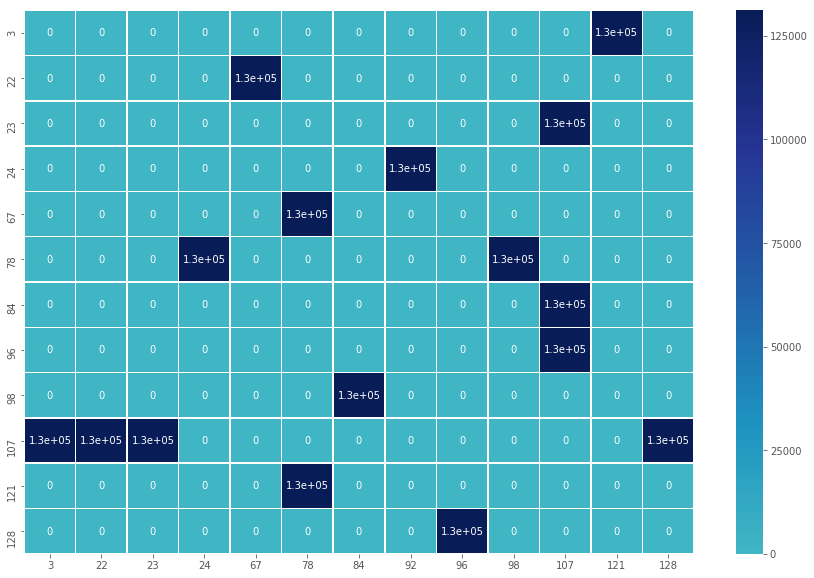

In [326]:
a4_dims = (15, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sbn.heatmap(clean, vmin=0,center=0, annot=True, linewidths=.5, cmap="YlGnBu")

In [ ]:
%%time
g = nx.DiGraph()
g.add_nodes_from(clean)

for i in list(set(new_flow.order_id)):
    
    grouped_object_df = grouped_object.get_group(i).sort_values(by='add_to_cart_order').reset_index(drop=True)
    
    aisles_list = list(grouped_object_df.aisle_id)#grouped_object.get_group(i).sort_values(by='add_to_cart_order').reset_index(drop=True).aisle_id)
    
    g.add_edges_from(list(zip(aisles_list,aisles_list[1:])))

        
gfig, gax = plt.subplots(figsize = (50,50))
nx.draw(g,nx.spring_layout(g, k=0.4, iterations = 1), ax=gax, with_labels = True, font_size = 50, node_size = 15)

In [ ]:
%load_ext py_d3


In [ ]:
%%d3 4.11.0

<style>

.group-tick line {
  stroke: #000;
}

.ribbons {
  fill-opacity: 0.67;
}
</style>

<svg width=960 height=960></svg>

<script>
var matrix =[[121.0, 162.0, 96.0, 58.0, 52.0, 21.0, 22.0, 25.0, 44.0, 40.0],
 [4412.0, 2032.0, 1448.0, 1933.0, 938.0, 1540.0, 172.0, 345.0, 529.0, 939.0],
 [44.0, 20.0, 19.0, 6.0, 12.0, 12.0, 1.0, 4.0, 21.0, 2.0],
 [1123.0, 683.0, 504.0, 554.0, 373.0, 517.0, 50.0, 172.0, 417.0, 425.0],
 [35.0, 44.0, 35.0, 29.0, 15.0, 20.0, 4.0, 12.0, 19.0, 14.0],
 [130.0, 103.0, 75.0, 44.0, 41.0, 31.0, 12.0, 22.0, 42.0, 23.0],
 [745.0, 856.0, 364.0, 221.0, 249.0, 266.0, 107.0, 154.0, 123.0, 237.0],
 [982.0, 815.0, 547.0, 341.0, 313.0, 163.0, 104.0, 161.0, 335.0, 200.0],
 [928.0, 1058.0, 528.0, 444.0, 816.0, 286.0, 143.0, 154.0, 308.0, 169.0],
 [713.0, 530.0, 334.0, 370.0, 212.0, 184.0, 21.0, 135.0, 141.0, 101.0]];

var svg = d3.select("svg"),
    width = +svg.attr("width"),
    height = +svg.attr("height"),
    outerRadius = Math.min(width, height) * 0.5 - 40,
    innerRadius = outerRadius - 30;

var formatValue = d3.formatPrefix(",.0", 1e3);

var chord = d3.chord()
    .padAngle(0.05)
    .sortSubgroups(d3.descending);

var arc = d3.arc()
    .innerRadius(innerRadius)
    .outerRadius(outerRadius);

var ribbon = d3.ribbon()
    .radius(innerRadius);

var color = d3.scaleOrdinal()
    .domain(d3.range(4))
    .range(["#000000", "#FFDD89", "#957244", "#F26223"]);

var g = svg.append("g")
    .attr("transform", "translate(" + width / 2 + "," + height / 2 + ")")
    .datum(chord(matrix));

var group = g.append("g")
    .attr("class", "groups")
  .selectAll("g")
  .data(function(chords) { return chords.groups; })
  .enter().append("g");

group.append("path")
    .style("fill", function(d) { return color(d.index); })
    .style("stroke", function(d) { return d3.rgb(color(d.index)).darker(); })
    .attr("d", arc);

var groupTick = group.selectAll(".group-tick")
  .data(function(d) { return groupTicks(d, 1e3); })
  .enter().append("g")
    .attr("class", "group-tick")
    .attr("transform", function(d) { return "rotate(" + (d.angle * 180 / Math.PI - 90) + ") translate(" + outerRadius + ",0)"; });

groupTick.append("line")
    .attr("x2", 6);

groupTick
  .filter(function(d) { return d.value % 5e3 === 0; })
  .append("text")
    .attr("x", 8)
    .attr("dy", ".35em")
    .attr("transform", function(d) { return d.angle > Math.PI ? "rotate(180) translate(-16)" : null; })
    .style("text-anchor", function(d) { return d.angle > Math.PI ? "end" : null; })
    .text(function(d) { return formatValue(d.value); });

g.append("g")
    .attr("class", "ribbons")
  .selectAll("path")
  .data(function(chords) { return chords; })
  .enter().append("path")
    .attr("d", ribbon)
    .style("fill", function(d) { return color(d.target.index); })
    .style("stroke", function(d) { return d3.rgb(color(d.target.index)).darker(); });

// Returns an array of tick angles and values for a given group and step.
function groupTicks(d, step) {
  var k = (d.endAngle - d.startAngle) / d.value;
  return d3.range(0, d.value, step).map(function(value) {
    return {value: value, angle: value * k + d.startAngle};
  });
}

</script>
